In [1]:
%matplotlib inline
import numpy as np
import numba
import matplotlib.pyplot as plt
import matplotlib.colors

# @customize plot style 
plt.rcParams['axes.grid'] = 'True'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.left'] = True
plt.rcParams['ytick.minor.right'] = True
plt.rcParams['figure.figsize'] = [4.0, 3.0]

plt.rc('font', family='serif')
custom_preamble = {
    "text.usetex": True,
    "text.latex.preamble": [
        r"\usepackage{amsmath}", # for the align enivironment
        ],
    }
plt.rcParams.update(custom_preamble)

# @working path
FIG_PATH     = '../tex/figs/'
WEB_FIG_PATH = '../tex/web-figs/'
DATA_PATH    = '../code/'


# @global settings
WEB_FIG_DPI  = 600
FIG_DPI      = 600
FIG_EXT      = '.pdf'
WEB_FIG_EXT  = '.png'

# @global functions
def savefig(handler,name, fig_ext = FIG_EXT, web_fig_ext = WEB_FIG_EXT):
    handler.savefig(FIG_PATH + name + fig_ext, dpi = FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)
    handler.savefig(WEB_FIG_PATH + name + web_fig_ext, dpi = WEB_FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)

In [2]:
def load_secular(name):
    data = np.loadtxt(name)
    t = data[:,0]
    L1 = data[:,1:4]
    e1 = data[:,4:7]
    L2 = data[:,7:10]
    e2 = data[:,10:13]
    out = {'t':t, 'L1':L1, 'e1':e1,'e2':e2,'L2':L2}
    l, w = data.shape
    
    if w > 13:
        s = data[:,13:16]
        out.update({'s1':s})
        
    return out
def load_std(name):
    data = np.loadtxt(name)
    t=data[:,0]
    e=data[:,1]

    out ={'t':t,'e1':e}
    
    l,w = data.shape
    
    if w>2:
        out.update({'s1':data[:,2]})
    return out

def draw_compare(prefix,id,d1,d2,tilt):
    
    subplt = 1
     
    if 's1' in d1:
        subplt += 2
    
    fig = plt.figure(figsize=(4,2*subplt))
    
    
    ax = fig.add_subplot(subplt,1,1)
    
    ax.set_title(tilt)
    ax.plot(d1['t'],1-d1['e1'],lw=0.5,label='Mathematica')
    ax.plot(d2['t'],1-np.sqrt((d2['e1']**2).sum(axis=1)),ls='-.',lw=0.5,label='C++')
   
    ax.set_xlabel('t [yr]')
    ax.set_ylabel('1-e')
    #plt.plot(d2['L2'][0:30000,0],d2['L2'][0:30000,1],'--',lw=0.1)
    #plt.plot(d1['t'],1-np.sqrt((d1['e1']**2).sum(axis=1)),label='C',ls='--',lw=0.5)
    ax.set_yscale('log')
    #ax.set_xlim([0,10])
    ax.legend(fontsize=6,ncol=3)
    
    if 's1' in d1:
        ax = fig.add_subplot(subplt,1,2)
        
        ax.plot(d1['t'], d1['s1'],label='mathematica',lw=0.5)
        
        L1 = d2['L1']
        s = d2['s1']
        theta = np.arccos((L1*s).sum(axis=1)/(np.sqrt((L1**2).sum(axis=1))*np.sqrt((s**2).sum(axis=1))))*180/np.pi
        
        ax.plot(d2['t'], theta,label='new',ls='-.',lw=0.5)
        ax.set_xlabel('t [yr]')
        ax.set_ylabel('$\\theta_{S_1L_{\mathrm{in}}}$')
        #ax.set_xlim([0,10])
    plt.tight_layout()   
    plt.savefig(prefix+'comp'+str(id)+'.png',bbox_inches = 'tight',dpi=300)
    
def load_title(name):
    fo = open(name)
    title={}
   
    for line in fo:
        key, info = line.split(":")
        title.update({key:info})
        
    return title


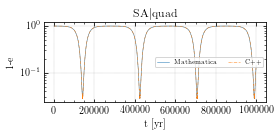

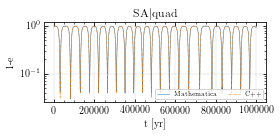

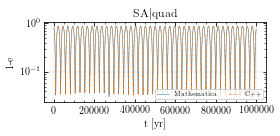

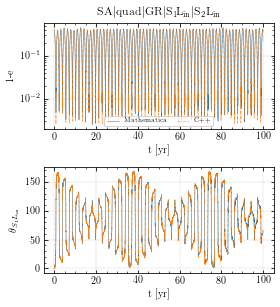

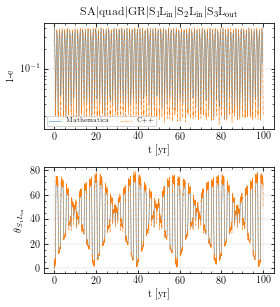

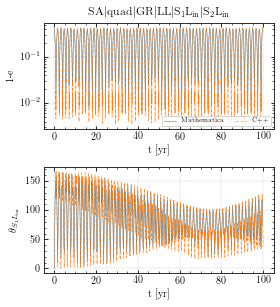

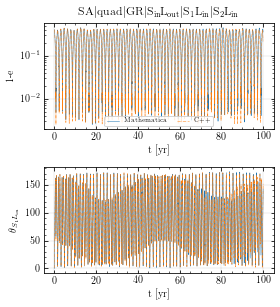

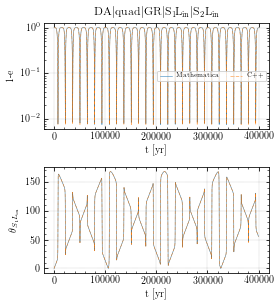

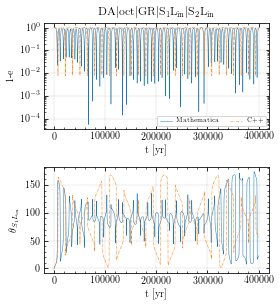

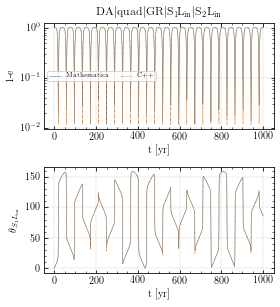

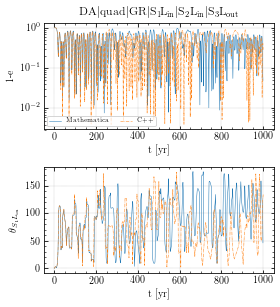

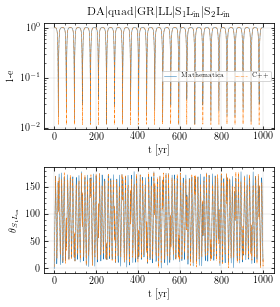

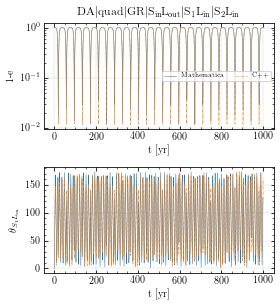

In [4]:
path='test/'
seq = np.arange(13)+1
#seq = [14, 15, 16, 17, 18, 19]
title= load_title(path+"log.txt")
for i in seq:
    data = load_secular(path+'output_'+str(i)+'.txt')
#std = load_secular('testDA/trajectory_4.txt')
    std = load_std('reg_test/std/eccentricity_'+str(i)+'.txt')
    draw_compare(path,i,std,data,"$\mathrm{"+title[str(i)].rstrip()+"}$")